In [1]:
import pandas as pd
from googleapiclient.discovery import build

In [ ]:
import os
load_dotenv()

In [4]:
api_key = os.environ.get("API_KEY")
video_id = 'YxQQnn22RXI'
 
comments = list()
api_obj = build('youtube', 'v3', developerKey=api_key)
response = api_obj.commentThreads().list(part='snippet,replies', videoId=video_id, maxResults=100).execute()

In [5]:
while response:
    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([comment['textDisplay'], comment['authorDisplayName'], comment['publishedAt'], comment['likeCount']])
 
        # if item['snippet']['totalReplyCount'] > 0:
        #     for reply_item in item['replies']['comments']:
        #         reply = reply_item['snippet']
        #         comments.append([reply['textDisplay'], reply['authorDisplayName'], reply['publishedAt'], reply['likeCount']])
 
    if 'nextPageToken' in response:
        response = api_obj.commentThreads().list(part='snippet,replies', videoId=video_id, pageToken=response['nextPageToken'], maxResults=100).execute()
    else:        
        break

In [6]:
df = pd.DataFrame(comments, columns=['comment', 'user_name', 'publish_date', 'likes'])
df

,comment,user_name,publish_date,likes
0,트수들에게 처음으로 동정심을 느낀나...,눈싸람,2021-07-11T09:19:22Z,144
1,만약 나중에도 가면 the cliff? 맞나 거기 가보세요 완전 발리온듯,않않,2022-03-08T07:34:08Z,0
2,언니 나 7월 2일에 생일이구 제주도 살아ㅏㅏㅏ,장나은,2022-03-07T08:43:41Z,0
3,ㅋㅋ,인생잼잼,2022-02-27T01:46:16Z,0
4,모니터 하면 멀리 거리두기 했다 ㅎㅋㅋㅋㅋㅋ,하이키키,2022-02-14T11:57:30Z,0
...,...,...,...,...
82,"제주도잘다녀오셨군요?,모바일로라도 제주도의 풍경을봐서 좋네요. ...",평택아이돌_정장선,2021-07-11T09:03:45Z,3
83,이모..오빠라뇨..,흔한 남고생,2021-07-11T09:03:36Z,0
84,누나 숙소는 갯벌 구멍이지??????,먹쟁이일상,2021-07-11T09:03:35Z,3
85,망둥어의 섬 귀향 vlog,낙신부,2021-07-11T09:02:56Z,1


In [7]:
df = df.drop_duplicates(['comment'], keep='first')
df

,comment,user_name,publish_date,likes
0,트수들에게 처음으로 동정심을 느낀나...,눈싸람,2021-07-11T09:19:22Z,144
1,만약 나중에도 가면 the cliff? 맞나 거기 가보세요 완전 발리온듯,않않,2022-03-08T07:34:08Z,0
2,언니 나 7월 2일에 생일이구 제주도 살아ㅏㅏㅏ,장나은,2022-03-07T08:43:41Z,0
3,ㅋㅋ,인생잼잼,2022-02-27T01:46:16Z,0
4,모니터 하면 멀리 거리두기 했다 ㅎㅋㅋㅋㅋㅋ,하이키키,2022-02-14T11:57:30Z,0
...,...,...,...,...
82,"제주도잘다녀오셨군요?,모바일로라도 제주도의 풍경을봐서 좋네요. ...",평택아이돌_정장선,2021-07-11T09:03:45Z,3
83,이모..오빠라뇨..,흔한 남고생,2021-07-11T09:03:36Z,0
84,누나 숙소는 갯벌 구멍이지??????,먹쟁이일상,2021-07-11T09:03:35Z,3
85,망둥어의 섬 귀향 vlog,낙신부,2021-07-11T09:02:56Z,1


In [8]:
df['comment'].values

array(['트수들에게 처음으로 동정심을 느낀나...',
       '만약 나중에도 가면 the cliff? 맞나 거기 가보세요 완전 발리온듯',
       '언니 나 7월 2일에 생일이구 제주도 살아ㅏㅏㅏ', 'ㅋㅋ', '모니터 하면 멀리 거리두기 했다 ㅎㅋㅋㅋㅋㅋ',
       '이사람 금방 또 떡상하것다', '귀엽고 예쁘세요ㅠ', '얘도 집캠 뿌셔야겠는데',
       '당시 실시간으로 못봐서 아쉽지만 엄청 재밌었곘네요! 눈싸람님 특히 고생하셧습니다👏',
       '우왕 제주도 사는데 언니 제주도도 왔었구나 ㅠ', '와 재밌었겠어요', '마지막에 흑돼지먹은데 서귀포시인가요?',
       '<a href="https://www.youtube.com/watch?v=YxQQnn22RXI&amp;t=2m28s">2:28</a> ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 아 개웃기넼ㅋㅋㅋㅋ',
       '뽀구미님 예쁘네요  💜💜💜💜💜💜', '제로투 민폐  개오지네....  <br><br>뻔뻔함이  딱 방송체질이다',
       '섬내일에 왠 다정하게 찍힌 망둥어얼굴 정면샷이 있네요 내용과는 전혀 맞지않아요. ㅋ  ^^      ㅋ     ^^    ㅋ     ^^   ㅋ ^^     ㅋ    ^^     ㅋ  ^^    ㅋ         ㅋ    ^^   ㅋ      ^^     ㅋ',
       '화장 안하셔도 눈이 정말 예쁘시다', '개구리도 섭외했나요ㅋㅋㅋㅋㅋㅋㅋㅋ', '마스크 끼세요',
       '시청자들 파워가 ㄷㄷ', '목.주.름',
       '<a href="https://www.youtube.com/watch?v=YxQQnn22RXI&amp;t=5m37s">5:37</a> 초에 저거 나인데 박제 고맙샤~ 유튜브에 처음으로 박제됐샤',
       '<a href="https://www.youtube.com/watch?v=YxQQnn22RXI&amp;t=03m48s">03:48</a> 고향 도착',
       '되게 어려보이시는데요<br>뽀구

In [9]:
import re

df['comment_refined'] = df['comment'].apply(lambda x: re.sub('[^가-힣\s]','',x))
df

,comment,user_name,publish_date,likes,comment_refined
0,트수들에게 처음으로 동정심을 느낀나...,눈싸람,2021-07-11T09:19:22Z,144,트수들에게 처음으로 동정심을 느낀나
1,만약 나중에도 가면 the cliff? 맞나 거기 가보세요 완전 발리온듯,않않,2022-03-08T07:34:08Z,0,만약 나중에도 가면 맞나 거기 가보세요 완전 발리온듯
2,언니 나 7월 2일에 생일이구 제주도 살아ㅏㅏㅏ,장나은,2022-03-07T08:43:41Z,0,언니 나 월 일에 생일이구 제주도 살아
3,ㅋㅋ,인생잼잼,2022-02-27T01:46:16Z,0,
4,모니터 하면 멀리 거리두기 했다 ㅎㅋㅋㅋㅋㅋ,하이키키,2022-02-14T11:57:30Z,0,모니터 하면 멀리 거리두기 했다
...,...,...,...,...,...
82,"제주도잘다녀오셨군요?,모바일로라도 제주도의 풍경을봐서 좋네요. ...",평택아이돌_정장선,2021-07-11T09:03:45Z,3,제주도잘다녀오셨군요모바일로라도 제주도의 풍경을봐서 좋네요 ...
83,이모..오빠라뇨..,흔한 남고생,2021-07-11T09:03:36Z,0,이모오빠라뇨
84,누나 숙소는 갯벌 구멍이지??????,먹쟁이일상,2021-07-11T09:03:35Z,3,누나 숙소는 갯벌 구멍이지
85,망둥어의 섬 귀향 vlog,낙신부,2021-07-11T09:02:56Z,1,망둥어의 섬 귀향


In [10]:
df = df[df['comment_refined'].apply(lambda x: re.sub('[^가-힣]','', x)) != '']
df

,comment,user_name,publish_date,likes,comment_refined
0,트수들에게 처음으로 동정심을 느낀나...,눈싸람,2021-07-11T09:19:22Z,144,트수들에게 처음으로 동정심을 느낀나
1,만약 나중에도 가면 the cliff? 맞나 거기 가보세요 완전 발리온듯,않않,2022-03-08T07:34:08Z,0,만약 나중에도 가면 맞나 거기 가보세요 완전 발리온듯
2,언니 나 7월 2일에 생일이구 제주도 살아ㅏㅏㅏ,장나은,2022-03-07T08:43:41Z,0,언니 나 월 일에 생일이구 제주도 살아
4,모니터 하면 멀리 거리두기 했다 ㅎㅋㅋㅋㅋㅋ,하이키키,2022-02-14T11:57:30Z,0,모니터 하면 멀리 거리두기 했다
5,이사람 금방 또 떡상하것다,art work tip,2022-02-13T17:44:35Z,0,이사람 금방 또 떡상하것다
...,...,...,...,...,...
82,"제주도잘다녀오셨군요?,모바일로라도 제주도의 풍경을봐서 좋네요. ...",평택아이돌_정장선,2021-07-11T09:03:45Z,3,제주도잘다녀오셨군요모바일로라도 제주도의 풍경을봐서 좋네요 ...
83,이모..오빠라뇨..,흔한 남고생,2021-07-11T09:03:36Z,0,이모오빠라뇨
84,누나 숙소는 갯벌 구멍이지??????,먹쟁이일상,2021-07-11T09:03:35Z,3,누나 숙소는 갯벌 구멍이지
85,망둥어의 섬 귀향 vlog,낙신부,2021-07-11T09:02:56Z,1,망둥어의 섬 귀향


In [11]:
!pip install soynlp

     |████████████████████████████████| 416 kB 29.4 MB/s 


In [12]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency=100, min_cohesion_forward=0.05, min_right_branching_entropy=0.0)
word_extractor.train(df['comment_refined'].values)
words = word_extractor.extract()
words

training was done. used memory 0.176 Gb
all cohesion probabilities was computed. # words = 0
all branching entropies was computed # words = 69
all accessor variety was computed # words = 69


{}

In [13]:
from soynlp.tokenizer import LTokenizer
from soynlp.word import WordExtractor
from soynlp.utils import DoublespaceLineCorpus


cohesion_score = {word: score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)

In [14]:
df['tokenized'] = df['comment_refined'].apply(lambda x: tokenizer.tokenize(x, remove_r=True))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,comment,user_name,publish_date,likes,comment_refined,tokenized
0,트수들에게 처음으로 동정심을 느낀나...,눈싸람,2021-07-11T09:19:22Z,144,트수들에게 처음으로 동정심을 느낀나,"[트수들에게, 처음으로, 동정심을, 느낀나]"
1,만약 나중에도 가면 the cliff? 맞나 거기 가보세요 완전 발리온듯,않않,2022-03-08T07:34:08Z,0,만약 나중에도 가면 맞나 거기 가보세요 완전 발리온듯,"[만약, 나중에도, 가면, 맞나, 거기, 가보세요, 완전, 발리온듯]"
2,언니 나 7월 2일에 생일이구 제주도 살아ㅏㅏㅏ,장나은,2022-03-07T08:43:41Z,0,언니 나 월 일에 생일이구 제주도 살아,"[언니, 나, 월, 일에, 생일이구, 제주도, 살아]"
4,모니터 하면 멀리 거리두기 했다 ㅎㅋㅋㅋㅋㅋ,하이키키,2022-02-14T11:57:30Z,0,모니터 하면 멀리 거리두기 했다,"[모니터, 하면, 멀리, 거리두기, 했다]"
5,이사람 금방 또 떡상하것다,art work tip,2022-02-13T17:44:35Z,0,이사람 금방 또 떡상하것다,"[이사람, 금방, 또, 떡상하것다]"
...,...,...,...,...,...,...
82,"제주도잘다녀오셨군요?,모바일로라도 제주도의 풍경을봐서 좋네요. ...",평택아이돌_정장선,2021-07-11T09:03:45Z,3,제주도잘다녀오셨군요모바일로라도 제주도의 풍경을봐서 좋네요 ...,"[제주도잘다녀오셨군요모바일로라도, 제주도의, 풍경을봐서, 좋네요, 매니저]"
83,이모..오빠라뇨..,흔한 남고생,2021-07-11T09:03:36Z,0,이모오빠라뇨,[이모오빠라뇨]
84,누나 숙소는 갯벌 구멍이지??????,먹쟁이일상,2021-07-11T09:03:35Z,3,누나 숙소는 갯벌 구멍이지,"[누나, 숙소는, 갯벌, 구멍이지]"
85,망둥어의 섬 귀향 vlog,낙신부,2021-07-11T09:02:56Z,1,망둥어의 섬 귀향,"[망둥어의, 섬, 귀향]"


In [15]:
words = []
for i in df['tokenized'].values:
    for k in i:
        words.append(k)

words

['트수들에게',
 '처음으로',
 '동정심을',
 '느낀나',
 '만약',
 '나중에도',
 '가면',
 '맞나',
 '거기',
 '가보세요',
 '완전',
 '발리온듯',
 '언니',
 '나',
 '월',
 '일에',
 '생일이구',
 '제주도',
 '살아',
 '모니터',
 '하면',
 '멀리',
 '거리두기',
 '했다',
 '이사람',
 '금방',
 '또',
 '떡상하것다',
 '귀엽고',
 '예쁘세요',
 '얘도',
 '집캠',
 '뿌셔야겠는데',
 '당시',
 '실시간으로',
 '못봐서',
 '아쉽지만',
 '엄청',
 '재밌었곘네요',
 '눈싸람님',
 '특히',
 '고생하셧습니다',
 '우왕',
 '제주도',
 '사는데',
 '언니',
 '제주도도',
 '왔었구나',
 '와',
 '재밌었겠어요',
 '마지막에',
 '흑돼지먹은데',
 '서귀포시인가요',
 '아',
 '개웃기넼',
 '뽀구미님',
 '예쁘네요',
 '제로투',
 '민폐',
 '개오지네',
 '뻔뻔함이',
 '딱',
 '방송체질이다',
 '섬내일에',
 '왠',
 '다정하게',
 '찍힌',
 '망둥어얼굴',
 '정면샷이',
 '있네요',
 '내용과는',
 '전혀',
 '맞지않아요',
 '화장',
 '안하셔도',
 '눈이',
 '정말',
 '예쁘시다',
 '개구리도',
 '섭외했나요',
 '마스크',
 '끼세요',
 '시청자들',
 '파워가',
 '목주름',
 '초에',
 '저거',
 '나인데',
 '박제',
 '고맙샤',
 '유튜브에',
 '처음으로',
 '박제됐샤',
 '고향',
 '도착',
 '되게',
 '어려보이시는데요뽀구미님',
 '그래서말인데요',
 '혹시나이가',
 '놀러가서까지',
 '방송하다니참된',
 '뽀구미네',
 '근데',
 '진짜',
 '편집기술이',
 '짱이다',
 '진짜',
 '가만히',
 '있으면',
 '너무',
 '이쁘신데',
 '춤출때',
 '두눈을',
 '찔끔감았다',
 '양서류와',
 '소통하는',
 '망둥어',
 '와우',
 '정말',
 '아름다

In [16]:
from collections import Counter

count = Counter(words)
available_count = Counter({x : count[x] for x in count if len(x) > 1})
word_dict = dict(available_count)
word_dict

{'가만히': 2,
 '가면': 2,
 '가보세요': 1,
 '가장': 2,
 '같다': 1,
 '같아서': 1,
 '같아요간신': 1,
 '개구리도': 1,
 '개오지네': 1,
 '개웃기넼': 1,
 '갯벌': 2,
 '거기': 1,
 '거리두기': 1,
 '고거': 1,
 '고맙샤': 1,
 '고생하셧습니다': 1,
 '고생하셨구요구미님': 1,
 '고양이': 1,
 '고양이의': 1,
 '고향': 1,
 '곳에서도': 1,
 '구독취소다': 1,
 '구멍이지': 1,
 '귀귀엽': 1,
 '귀랑': 1,
 '귀야웡': 1,
 '귀여운': 1,
 '귀여운데': 1,
 '귀엽고': 1,
 '귀엽네요': 1,
 '귀하군요': 1,
 '귀향': 1,
 '그걸': 1,
 '그나마': 1,
 '그날밤': 1,
 '그래서말인데요': 1,
 '근데': 1,
 '금방': 1,
 '기다리지': 1,
 '깔끔하고': 1,
 '꿀잼': 1,
 '끼세요': 1,
 '나는': 1,
 '나름': 1,
 '나인데': 1,
 '나중에도': 1,
 '내용과는': 1,
 '너무': 7,
 '너무예뻐요': 1,
 '놀러가서까지': 1,
 '놀리냐': 1,
 '누군데': 1,
 '누나': 1,
 '누님': 1,
 '눈싸람님': 2,
 '눈싸람님이': 1,
 '눈싸람보고': 1,
 '눈이': 2,
 '느끼나': 1,
 '느낀나': 1,
 '늘어': 1,
 '다정하게': 1,
 '다행인지': 1,
 '단계인데': 1,
 '단계좀': 1,
 '당시': 1,
 '대신해주네': 1,
 '더더욱': 1,
 '더러워요': 1,
 '도착': 1,
 '돌려내': 1,
 '동정심을': 1,
 '돼는': 1,
 '되게': 1,
 '되야지': 1,
 '두눈을': 1,
 '두분다': 1,
 '떡상하것다': 1,
 '뜨는거지': 1,
 '레전드였음': 1,
 '마스크': 2,
 '마지막에': 1,
 '만나서': 1,
 '만약': 1,
 '많아져서': 1,
 '많이': 1,
 '말을': 1,
 '망가졌어요': 1,


In [17]:
sorted_word_dict = sorted(word_dict.items(), key = lambda item: item[1], reverse = True)
sorted_word_dict[:10]

[('제주도', 10),
 ('너무', 7),
 ('정말', 5),
 ('뽀구미님', 4),
 ('진짜', 4),
 ('있으면', 3),
 ('망둥어', 3),
 ('여행', 3),
 ('편집', 3),
 ('처음으로', 2)]

In [18]:
df_words = pd.DataFrame(sorted_word_dict, columns=['word', 'count'])
df_words['word'].to_csv('df_words.csv', index=False)

In [20]:
# 한글 표시 설정
import matplotlib as mpl
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155203 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [21]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', width=500, height=500, background_color="white").generate_from_frequencies(word_dict)

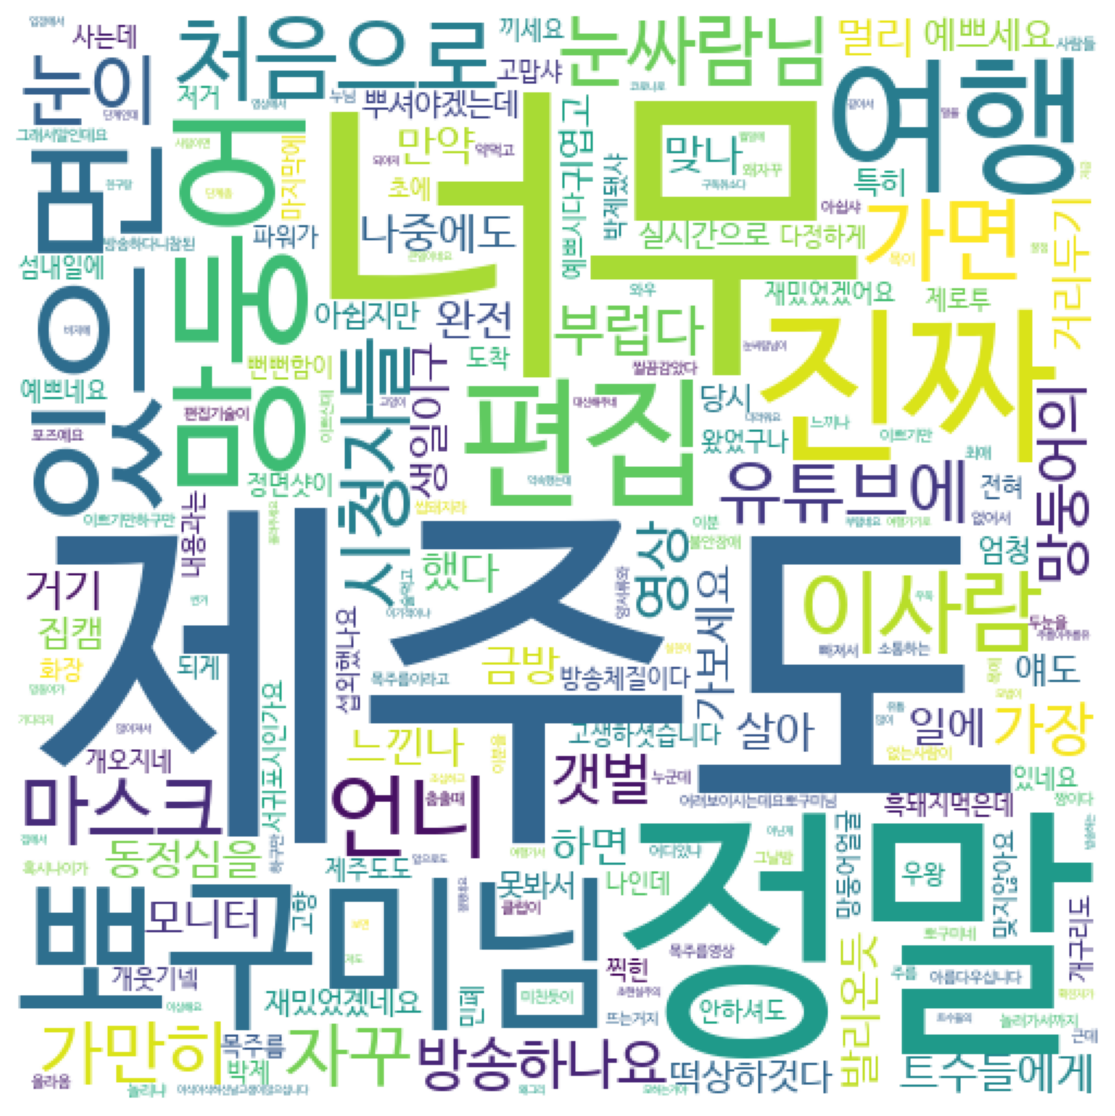

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()